## Import Libraries

In [ ]:
import re
import string
import fasttext
import numpy as np
import pandas as pd
from datetime import datetime
from langdetect import detect
import math

import nltk
# nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from scipy import sparse

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Reviews Data

In [ ]:
reviews = pd.read_csv('SG_cleaned_reviews.csv', lineterminator='\n')
reviews

,listing_id,comments
0,50646,A comfortable room in a smart condo developmen...
1,50646,Stayed over at Sujatha's house for 3 good nigh...
2,50646,It's been a lovely stay at Sujatha's. The room...
3,50646,"We had a great experience. A nice place, an am..."
4,50646,Quiet condo. Comfortable stay and good location.
...,...,...
43138,53388036,Wei is an amazing host! Quick response from We...
43139,53408171,Easy to work with and good apartment
43140,53614218,Thank you Lucas and Sandy for having me! Sandy...
43141,53679344,Great host and amazing experience. Got the one...


## Listings Data

In [ ]:
listings = pd.read_csv('SG_dist_cleaned_listings.csv')
listings

,id,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,amenities_str,dist_to_subway
0,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,2010-09-08,No Data,NaN,NaN,f,1.0,...,4.72,4.78,4.78,4.94,4.72,4.50,f,1,"""Shampoo"", ""Essentials"", ""Kitchen"", ""Long term...",0.534995
1,71609,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4 The spa...,No Data,2011-01-29,within a day,100.0,NaN,f,8.0,...,4.37,4.00,4.63,4.78,4.26,4.32,f,5,"""Hangers"", ""Cooking basics"", ""Washer"", ""Hair d...",0.926167
2,71896,B&B Room 1 near Airport & EXPO,The space Vocational Stay Deluxe Bedroom in ...,No Data,2011-01-29,within a day,100.0,NaN,f,8.0,...,4.22,4.09,4.43,4.43,4.17,4.04,f,5,"""Coffee maker"", ""Cooking basics"", ""Washer"", ""H...",0.802740
3,71903,Room 2-near Airport & EXPO,"Like your own home, 24hrs access. The space ...",Quiet and view of the playground with exercise...,2011-01-29,within a day,100.0,NaN,f,8.0,...,4.39,4.52,4.63,4.64,4.50,4.36,f,5,"""Coffee maker"", ""Cooking basics"", ""Washer"", ""H...",1.085987
4,275343,"Conveniently located City Room!(1,2,3,4,5,6,7,8)","Awesome location and host Room near INSEAD, N...",No Data,2011-11-24,within a few hours,87.0,77.0,f,16.0,...,4.12,4.24,4.53,4.47,4.53,4.59,f,16,"""Shampoo"", ""Essentials"", ""Keypad"", ""Kitchen"", ...",0.775047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,53905492,Standard Twin,The space Hotel accommodations have been car...,No Data,2021-12-06,within an hour,100.0,100.0,f,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,t,4,"""Security cameras on property"", ""Hangers"", ""Lo...",0.474254
3141,53905653,Standard Queen & Single,The space Hotel accommodations have been car...,No Data,2021-12-06,within an hour,100.0,100.0,f,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,t,4,"""Security cameras on property"", ""Hangers"", ""Lo...",0.259387
3142,53910005,Affordable Office for 8 Pax in Heart of East,Convenient location in the heart of East Singa...,No Data,2017-04-04,a few days or more,0.0,NaN,f,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,t,1,"""Long term stays allowed"", ""Air conditioning"",...",1.328809
3143,53910434,Deluxe Class 2BR Near Marina Bay,Situated near the bustling neighborhood of Mar...,"Located near the CBD, enjoy a wide variety of...",2017-10-27,within a few hours,95.0,30.0,f,225.0,...,0.00,0.00,0.00,0.00,0.00,0.00,f,179,"""Cleaning before checkout"", ""Safe"", ""Hangers"",...",0.242125


## Detect Language

In [ ]:
model = fasttext.load_model('lid.176.ftz')

def detect_lang(x):
    lang = model.predict(x, k=1)[0][0].split('__')[-1]
    return lang

In [ ]:
# Check if reviews are in English
reviews['language'] = reviews['comments'].apply(lambda x: detect_lang(x))
reviews.head()

,listing_id,comments,language
0,50646,A comfortable room in a smart condo developmen...,en
1,50646,Stayed over at Sujatha's house for 3 good nigh...,en
2,50646,It's been a lovely stay at Sujatha's. The room...,en
3,50646,"We had a great experience. A nice place, an am...",en
4,50646,Quiet condo. Comfortable stay and good location.,en


In [ ]:
# Check if listings' name and description are in English
check_language = ['name', 'description']
check_language_new_col= ['name_lang', 'description_lang']

for i in range(len(check_language)):
    listings[check_language_new_col[i]] = listings[check_language[i]].apply(lambda x: detect_lang(x))

listings.head()

,id,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,amenities_str,dist_to_subway,name_lang,description_lang
0,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,2010-09-08,No Data,NaN,NaN,f,1.0,...,4.78,4.94,4.72,4.50,f,1,"""Shampoo"", ""Essentials"", ""Kitchen"", ""Long term...",0.534995,en,en
1,71609,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4 The spa...,No Data,2011-01-29,within a day,100.0,NaN,f,8.0,...,4.63,4.78,4.26,4.32,f,5,"""Hangers"", ""Cooking basics"", ""Washer"", ""Hair d...",0.926167,en,en
2,71896,B&B Room 1 near Airport & EXPO,The space Vocational Stay Deluxe Bedroom in ...,No Data,2011-01-29,within a day,100.0,NaN,f,8.0,...,4.43,4.43,4.17,4.04,f,5,"""Coffee maker"", ""Cooking basics"", ""Washer"", ""H...",0.802740,en,en
3,71903,Room 2-near Airport & EXPO,"Like your own home, 24hrs access. The space ...",Quiet and view of the playground with exercise...,2011-01-29,within a day,100.0,NaN,f,8.0,...,4.63,4.64,4.50,4.36,f,5,"""Coffee maker"", ""Cooking basics"", ""Washer"", ""H...",1.085987,en,en
4,275343,"Conveniently located City Room!(1,2,3,4,5,6,7,8)","Awesome location and host Room near INSEAD, N...",No Data,2011-11-24,within a few hours,87.0,77.0,f,16.0,...,4.53,4.47,4.53,4.59,f,16,"""Shampoo"", ""Essentials"", ""Keypad"", ""Kitchen"", ...",0.775047,en,en


## Remove Non-English Records

We are aware that detect_lang model used is not 100% accurate. Since we have much fewer listings than reviews, we will further inspect listings with non-English names and descriptions. We will manually check through the names and descriptions of such listings and only remove those that are correctly labelled as non-English. For reviews, we will drop those which have been identified by the model as non-English.

In [ ]:
listings[(listings['name_lang'] != 'en') & (listings['description_lang'] != 'en')]
# 39 listings with non-English name and description

,id,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,amenities_str,dist_to_subway,name_lang,description_lang
123,4640273,索美赛River Valley,索美赛River Valley，泳池公寓小主人房出租！超快无线网 空调洗衣机厨房可煮。公车站...,No Data,2014-11-22,No Data,NaN,NaN,f,1.0,...,0.00,0.00,0.00,0.00,f,1,"""Kitchen"", ""Long term stays allowed"", ""Washer""...",1.055524,zh,zh
209,6663672,新加坡传统祖屋 客厅大 通风好,有空调 有wifi 近bus 近地铁 近吃饭的地方 明亮 干净,No Data,2015-04-22,No Data,NaN,NaN,f,1.0,...,0.00,0.00,0.00,0.00,f,1,"""Kitchen"", ""Long term stays allowed"", ""Washer""...",0.344682,zh,zh
325,8957363,Blk 210 Bukit Batok St 21,"Blk 210 Bukit Batok St 21,nearby MRT,Coffee Sh...",No Data,2015-10-18,No Data,NaN,NaN,f,1.0,...,0.00,0.00,0.00,0.00,f,1,"""Essentials"", ""Cleaning before checkout"", ""Kit...",0.476448,hu,zh
343,9282668,COMFORTABLE SUITE WITH A VIEW.(2),"PEACEFUL, TRANQUIL ENVIRONMENTAL SURROUNDINGS ...",No Data,2015-06-05,within a few hours,71.0,100.0,f,5.0,...,0.00,0.00,0.00,0.00,t,3,"""Long term stays allowed"", ""Private entrance"",...",1.783559,ja,ja
411,10936529,出租夫妻房长期居住每月新币700，有意者请拨新加坡号码81370968,"环境好,出行方便",No Data,2016-01-30,No Data,NaN,NaN,f,1.0,...,0.00,0.00,0.00,0.00,f,1,"""Kitchen"", ""Long term stays allowed"", ""Washer""...",0.676667,zh,zh
414,11126190,FAMILY-FRIENDLY EN-SUITE,THIS AMAZING. FAMILY-FRIENDLY SUITE COMES WITH...,No Data,2016-02-07,within a day,100.0,0.0,f,7.0,...,0.00,0.00,0.00,0.00,f,4,"""Long term stays allowed"", ""Hair dryer"", ""Firs...",1.947810,zh,nl
426,11442336,文庆地铁站全新公寓出租,地铁站旁全新公寓，距离CBD地铁四站路，交通生活便利，一房一厅位于高层，景观无敌，前后没遮挡...,距离地铁站100米,2016-02-23,a few days or more,0.0,NaN,f,1.0,...,0.00,0.00,0.00,0.00,f,1,"""Long term stays allowed""",0.639707,id,zh
478,12583148,geylang 14 主人房 master room1300sgd,geylang14巷 主人房出租 1个人1300 2个人1400 包水电网 空调 床（可以换...,No Data,2015-11-07,No Data,NaN,NaN,f,1.0,...,0.00,0.00,0.00,0.00,f,1,"""Shampoo"", ""Essentials"", ""Extra pillows and bl...",0.580340,ja,zh
488,12815967,阿裕尼公寓普通房急需女搭房一名联系人:郑小姐 电话：,阿裕尼高级公寓普通房寻求女搭房 450／月，包水电网，拎包即可入住（冰箱，洗衣机，微波炉，热...,No Data,2016-05-02,No Data,NaN,NaN,f,1.0,...,0.00,0.00,0.00,0.00,f,1,"""Essentials"", ""Hangers"", ""Kitchen"", ""Long term...",0.825595,zh,zh
525,13540021,Boonlay MRT 1,"我的房源靠近夜生活和公共交通。因为户外空间、街区、氛围,您一定会爱上我的房源。我的房源适合孤...",No Data,2015-12-16,within a day,100.0,NaN,f,1.0,...,0.00,0.00,0.00,0.00,f,2,"""Essentials"", ""Hangers"", ""Kitchen"", ""Long term...",0.516369,hu,zh


In [ ]:
# By manual inspection, some listings were incorrectly labelled as non-English
eng_listings = [11126190, 8957363, 9282668, 20774506, 20774607]

for l in eng_listings:
    listings.loc[listings['id'] == l, ['name_lang', 'description_lang']] = 'en'

In [ ]:
# Drop listings with non-English names and descriptions
listings = listings[~((listings['name_lang'] != 'en') & (listings['description_lang'] != 'en'))]

In [ ]:
# Drop 34 reviews which are non-English
reviews = reviews[~(reviews['language'] != 'en')]

## Remove Web Links

In [ ]:
def remove_weblinks(txt):
    txt = re.sub(r'https\S+', '', txt)
    txt = re.sub(r'http\S+', '', txt)
    txt = re.sub(r'www\S+', '', txt)
    txt = txt.replace('https', '')
    txt = txt.replace('http', '')
    txt = txt.replace('www', '')
    return txt

In [ ]:
# Remove from listing descriptions and reviews
listings['description'] = listings['description'].apply(remove_weblinks)
reviews['comments'] = reviews['comments'].apply(remove_weblinks)

<ipython-input-26-f12a8d00fec3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['description'] = listings['description'].apply(remove_weblinks)
<ipython-input-26-f12a8d00fec3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['comments'] = reviews['comments'].apply(remove_weblinks)


## Length of Words in Reviews

In [ ]:
# Count the number of words in review comments
reviews['num_words'] = reviews['comments'].apply(lambda x: sum([i.strip(string.punctuation).isalpha() for i in x.split()]))
reviews.head()

<ipython-input-27-9ca1fa855049>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['num_words'] = reviews['comments'].apply(lambda x: sum([i.strip(string.punctuation).isalpha() for i in x.split()]))


,listing_id,comments,language,num_words
0,50646,A comfortable room in a smart condo developmen...,en,37
1,50646,Stayed over at Sujatha's house for 3 good nigh...,en,67
2,50646,It's been a lovely stay at Sujatha's. The room...,en,39
3,50646,"We had a great experience. A nice place, an am...",en,17
4,50646,Quiet condo. Comfortable stay and good location.,en,7


## Calculate Number of Months Since Joining Airbnb as Host

In [ ]:
# Calculate the number of months since host was registered onto Airbnb based on 'host_since'
date_scraped = datetime.fromisoformat('2022-01-03')
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['host_months'] = date_scraped - listings['host_since']
listings['host_months'] = (listings['host_months'] / np.timedelta64(1,'M'))

# Round up the number of months since host registered on Airbnb
listings['host_months'] = np.ceil(listings['host_months']).astype(int)
listings.head()

<ipython-input-28-57c9b43a1d1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['host_since'] = pd.to_datetime(listings['host_since'])
<ipython-input-28-57c9b43a1d1b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['host_months'] = date_scraped - listings['host_since']
<ipython-input-28-57c9b43a1d1b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,id,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,amenities_str,dist_to_subway,name_lang,description_lang,host_months
0,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,2010-09-08,No Data,NaN,NaN,f,1.0,...,4.94,4.72,4.50,f,1,"""Shampoo"", ""Essentials"", ""Kitchen"", ""Long term...",0.534995,en,en,136
1,71609,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4 The spa...,No Data,2011-01-29,within a day,100.0,NaN,f,8.0,...,4.78,4.26,4.32,f,5,"""Hangers"", ""Cooking basics"", ""Washer"", ""Hair d...",0.926167,en,en,132
2,71896,B&B Room 1 near Airport & EXPO,The space Vocational Stay Deluxe Bedroom in ...,No Data,2011-01-29,within a day,100.0,NaN,f,8.0,...,4.43,4.17,4.04,f,5,"""Coffee maker"", ""Cooking basics"", ""Washer"", ""H...",0.802740,en,en,132
3,71903,Room 2-near Airport & EXPO,"Like your own home, 24hrs access. The space ...",Quiet and view of the playground with exercise...,2011-01-29,within a day,100.0,NaN,f,8.0,...,4.64,4.50,4.36,f,5,"""Coffee maker"", ""Cooking basics"", ""Washer"", ""H...",1.085987,en,en,132
4,275343,"Conveniently located City Room!(1,2,3,4,5,6,7,8)","Awesome location and host Room near INSEAD, N...",No Data,2011-11-24,within a few hours,87.0,77.0,f,16.0,...,4.47,4.53,4.59,f,16,"""Shampoo"", ""Essentials"", ""Keypad"", ""Kitchen"", ...",0.775047,en,en,122


In [ ]:
# Store processed listings and reviews as csv
listings.to_csv('SG_processed_listings.csv', index=False)
reviews.to_csv('SG_processed_reviews.csv', index=False)

## Combining Listings & Reviews

In [ ]:
listings = pd.read_csv('SG_processed_listings.csv')
reviews = pd.read_csv('SG_processed_reviews.csv', lineterminator='\n')

In [ ]:
reviews.columns = ['id', 'comments', 'num_words', 'language']

combined = pd.merge(listings, reviews, on='id', how='left')
combined = combined.drop(['num_words', 'language'], axis=1)
combined_comments = combined.groupby('id')['comments'].apply(lambda x: list(x)).reset_index()
combined_comments['comments'] = combined_comments['comments'].apply(lambda x: [] if x[0] != x[0] else x)
combined = pd.merge(listings, combined_comments, on='id', how='left')

combined

,id,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,amenities_str,dist_to_subway,name_lang,description_lang,host_months,comments
0,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,2010-09-08,No Data,NaN,NaN,f,1.0,...,4.72,4.50,f,1,"""Shampoo"", ""Essentials"", ""Kitchen"", ""Long term...",0.534995,en,en,136,[A comfortable room in a smart condo developme...
1,71609,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4 The spa...,No Data,2011-01-29,within a day,100.0,NaN,f,8.0,...,4.26,4.32,f,5,"""Hangers"", ""Cooking basics"", ""Washer"", ""Hair d...",0.926167,en,en,132,[The rooms were clean and tidy. Beds very comf...
2,71896,B&B Room 1 near Airport & EXPO,The space Vocational Stay Deluxe Bedroom in ...,No Data,2011-01-29,within a day,100.0,NaN,f,8.0,...,4.17,4.04,f,5,"""Coffee maker"", ""Cooking basics"", ""Washer"", ""H...",0.802740,en,en,132,[Belinda is a kind host who certainly tries to...
3,71903,Room 2-near Airport & EXPO,"Like your own home, 24hrs access. The space ...",Quiet and view of the playground with exercise...,2011-01-29,within a day,100.0,NaN,f,8.0,...,4.50,4.36,f,5,"""Coffee maker"", ""Cooking basics"", ""Washer"", ""H...",1.085987,en,en,132,[I stayed at Belinda's place for 4 nights duri...
4,275343,"Conveniently located City Room!(1,2,3,4,5,6,7,8)","Awesome location and host Room near INSEAD, N...",No Data,2011-11-24,within a few hours,87.0,77.0,f,16.0,...,4.53,4.59,f,16,"""Shampoo"", ""Essentials"", ""Keypad"", ""Kitchen"", ...",0.775047,en,en,122,[A newly renovated and clean apartment. Conven...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,53905492,Standard Twin,The space Hotel accommodations have been car...,No Data,2021-12-06,within an hour,100.0,100.0,f,0.0,...,0.00,0.00,t,4,"""Security cameras on property"", ""Hangers"", ""Lo...",0.474254,en,en,1,[]
3107,53905653,Standard Queen & Single,The space Hotel accommodations have been car...,No Data,2021-12-06,within an hour,100.0,100.0,f,0.0,...,0.00,0.00,t,4,"""Security cameras on property"", ""Hangers"", ""Lo...",0.259387,en,en,1,[]
3108,53910005,Affordable Office for 8 Pax in Heart of East,Convenient location in the heart of East Singa...,No Data,2017-04-04,a few days or more,0.0,NaN,f,0.0,...,0.00,0.00,t,1,"""Long term stays allowed"", ""Air conditioning"",...",1.328809,en,en,58,[]
3109,53910434,Deluxe Class 2BR Near Marina Bay,Situated near the bustling neighborhood of Mar...,"Located near the CBD, enjoy a wide variety of...",2017-10-27,within a few hours,95.0,30.0,f,225.0,...,0.00,0.00,f,179,"""Cleaning before checkout"", ""Safe"", ""Hangers"",...",0.242125,en,en,51,[]


In [ ]:
combined.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'amenities_str',

# Further processing of cols

In [ ]:
combined['availability_30'] = combined['availability_30'].apply(lambda x: float(x) / 30)
combined['availability_60'] = combined['availability_60'].apply(lambda x: float(x) / 60)
combined['availability_90'] = combined['availability_90'].apply(lambda x: float(x) / 90)
combined['availability_365'] = combined['availability_365'].apply(lambda x: float(x) / 365)

In [ ]:
combined.to_csv('SG_reviews_listings.csv', index=False)

## Text Cleaning

In [ ]:
combined = pd.read_csv('./SG_reviews_listings.csv')

In [ ]:
# from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

lemmatizer = WordNetLemmatizer()
# pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
# txt = pattern.sub('', txt)
def clean_text(txt):
    txt = txt.translate(str.maketrans('', '', string.punctuation))
    txt = re.sub(r'[^\w\s]','',txt)
    txt = txt.lower()
    txt = nltk.word_tokenize(txt)
    txt = ' '.join(lemmatizer.lemmatize(w) for w in txt) #remove stopwords later
    return txt

In [ ]:
combined['processed_name'] = combined['name'].apply(clean_text)
combined['processed_description'] = combined['description'].apply(clean_text)
combined['processed_neighborhood_overview'] = combined['neighborhood_overview'].apply(clean_text)
combined['comments'] = combined['comments'].apply(clean_text)
combined['combined_text'] = combined['processed_name'] + ' ' + combined['processed_description'] + ' ' + combined['processed_neighborhood_overview'] + " " + combined['comments']
# combined['combined_text'] = combined['processed_name'] + ' ' + combined['processed_description'] + ' ' + combined['processed_neighborhood_overview']

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

combined_train, combined_test = train_test_split(combined, test_size = 0.3, random_state = 2022)
combined_val, combined_test = train_test_split(combined_test, test_size = 0.5, random_state = 2023)

print([combined_train.shape, combined_val.shape, combined_test.shape])

[(2177, 54), (467, 54), (467, 54)]


In [ ]:
combined_train.to_csv('SG_combined_train.csv', index = False)
combined_val.to_csv('SG_combined_val.csv', index = False)
combined_test.to_csv('SG_combined_test.csv', index = False)

# Transforming data to features

In [ ]:
train = pd.read_csv('SG_combined_train.csv')
val = pd.read_csv('SG_combined_val.csv')
test = pd.read_csv('SG_combined_test.csv')

In [ ]:
def get_float(txt):
    lst = re.findall(r"[-+]?(?:\d*\.\d+|\d+)", txt)
    if len(lst) == 0:
        return 'No Data'
    return float(lst[0])

train['bathrooms_text'] = train['bathrooms_text'].apply(get_float)
val['bathrooms_text'] = val['bathrooms_text'].apply(get_float)
test['bathrooms_text'] = test['bathrooms_text'].apply(get_float)

AxesSubplot(0.125,0.125;0.775x0.755)
count    23097.000000
mean         2.856778
std          1.886802
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
dtype: float64


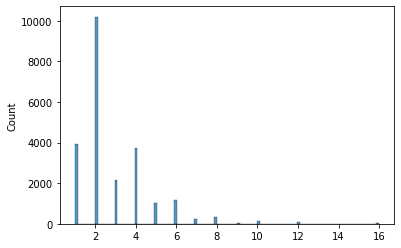

In [ ]:
import seaborn as sns

vals = train['accommodates'].values

print(sns.histplot(vals))
print(pd.Series(vals).describe())

In [ ]:
#bins: 1-2, 3-4, 5-6, everything else
def get_bins_mean(df):
    vals = df['accommodates'].values
    bathrooms = df['bathrooms_text'].values
    bins_dct = {'1-4':[], '5-6':[], 'else':[]}
    for j in range(len(vals)):
        i = vals[j]
        currb = bathrooms[j]
        if type(currb) != float or currb != currb:
            continue
        if i >= 1 and i <= 4:
            bins_dct['1-4'].append(currb)
        elif i >= 5 and i <= 6:
            bins_dct['5-6'].append(currb)
        else:
            bins_dct['else'].append(currb)

    for i in bins_dct:
        bins_dct[i] = np.mean(bins_dct[i])

    return bins_dct

bathroom_bins_dct = get_bins_mean(train)
bathroom_bins_dct

{'1-4': 1.111844416562108,
 '5-6': 1.3925638686131387,
 'else': 1.9763736263736265}

In [ ]:
#fill up with corresponding means
def bin_bathrooms(row):
    if type(row['bathrooms_text']) == float and row['bathrooms_text'] == row['bathrooms_text']:
        return row['bathrooms_text']  
    currac = row['accommodates']
    if currac >= 1 and currac <= 4:
        return 1
    elif currac >= 5 and currac <= 6:
        return 1.5
    else:
        return 2

train['bathrooms_text'] = train.apply(bin_bathrooms, axis = 1)
val['bathrooms_text'] = val.apply(bin_bathrooms, axis = 1)
test['bathrooms_text'] = test.apply(bin_bathrooms, axis = 1)

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

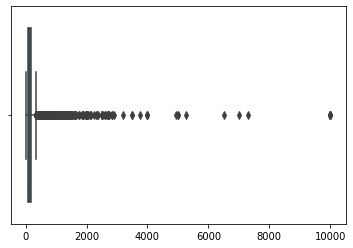

In [ ]:
#to decide cut off value for price to remove extreme listings
import seaborn as sns

sns.boxplot(train['price'].values)

In [ ]:
train['price'].describe()

count    2177.000000
mean      201.136886
std       303.899621
min        13.000000
25%        68.000000
50%       136.000000
75%       228.000000
max      7000.000000
Name: price, dtype: float64

In [ ]:
from matplotlib.cbook import boxplot_stats  

outliers = list(boxplot_stats(train['price'])[0]['fliers'])
outliers.sort()
print(outliers)

[346.0, 346.0, 346.0, 347.0, 347.0, 347.0, 347.0, 347.0, 347.0, 348.0, 348.0, 348.0, 348.0, 348.0, 348.0, 348.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0

In [ ]:
threshold = 1000
train_vals = train['price'].values
val_vals = val['price'].values
test_vals = test['price'].values
train_left = 0
val_left = 0
test_left = 0
for i in train_vals:
    if i < threshold:
        train_left += 1
for i in val_vals:
    if i < threshold:
        val_left += 1
for i in test_vals:
    if i < threshold:
        test_left += 1
print([train_left, val_left, test_left])

train = train[train['price'] < threshold]
val = val[val['price'] < threshold]
test = test[test['price'] < threshold]

print([train.shape, val.shape, test.shape])

[2151, 459, 458]
[(2151, 54), (459, 54), (458, 54)]


In [ ]:
# from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

lemmatizer = WordNetLemmatizer()
# pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
# txt = pattern.sub('', txt)
def clean_text(txt):
    txt = txt.translate(str.maketrans('', '', string.punctuation))
    txt = re.sub(r'[^\w\s]','',txt)
    txt = txt.lower()
    txt = nltk.word_tokenize(txt)
    txt = ' '.join(lemmatizer.lemmatize(w) for w in txt) #remove stopwords later
    return txt

In [ ]:
#fill in missing values
# def fill_mean(df, col_name):
#     tot = 0
#     for i in df[col_name]:
#         if i != 'No Data' and i == i:
#             tot += float(i)
#     mean = float(tot) / df.shape[0]
#     df[col_name] = df[col_name].apply(lambda x: mean if x == 'No Data' or x != x else float(x))
#     return mean, df

# def fill_mean_val_test(df, col_name, mean):
#     df[col_name] = df[col_name].apply(lambda x: mean if x == 'No Data' or x != x else float(x))
#     return df

# mean, train = fill_mean(train, 'host_response_rate')
# val = fill_mean_val_test(val, 'host_response_rate', mean)
# test = fill_mean_val_test(test, 'host_response_rate', mean)
# mean, train = fill_mean(train, 'host_acceptance_rate')
# val = fill_mean_val_test(val, 'host_acceptance_rate', mean)
# test = fill_mean_val_test(test, 'host_acceptance_rate', mean)
def fill_zeroes(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: 0 if x == 'No Data' or x != x else float(x))
    return df

train = fill_zeroes(train, 'host_response_rate')
val = fill_zeroes(val, 'host_response_rate')
test = fill_zeroes(test, 'host_response_rate')
train = fill_zeroes(train, 'host_acceptance_rate')
val = fill_zeroes(val, 'host_acceptance_rate')
test = fill_zeroes(test, 'host_acceptance_rate')

In [ ]:
#Standardising the numerical columns
means_sd_dict = {} #to recover the means and sd used to standardise each feature
def standardise_train(df, col_name):
    mean = np.mean(df[col_name])
    sd = np.std(df[col_name])
    df[col_name] = df[col_name].apply(lambda x: (x - mean) / sd)
    means_sd_dict[col_name] = [mean, sd]
    return df

def standardise_val_test(df, col_name):
    mean = means_sd_dict[col_name][0]
    sd = means_sd_dict[col_name][1]
    df[col_name] = df[col_name].apply(lambda x: (x - mean) / sd)
    return df

numerical_features = ['host_months', 'host_response_rate', 'host_acceptance_rate', 
'host_listings_count', 'accommodates', 'bedrooms', 'beds', 'price', 
'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 
'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
'review_scores_value', 'calculated_host_listings_count', 'dist_to_subway']
for feat in numerical_features:
    train = standardise_train(train, feat)
    val = standardise_val_test(val, feat)
    test = standardise_val_test(test, feat)

In [ ]:
#One hot encoding the categorical columns
from sklearn.preprocessing import OneHotEncoder
ohe_dict = {} #store the ohes to transform the val and test correctly
feat_train_dict = {} #store all sparse matrices from the ohe. Will do hstack later
feat_val_dict = {}
feat_test_dict = {}
def one_hot_train(df, col_name):
    enc = OneHotEncoder(drop = 'first')
    vals = df[col_name].values.reshape(-1, 1)
    if 'no data' not in df[col_name].unique():
        label_to_change = df[col_name].value_counts().index[-1]
        for i in range(len(vals)):
            if vals[i] == label_to_change:
                vals[i] = 'no data'
    trf = enc.fit_transform(vals)
    feat_train_dict[col_name] = trf
    ohe_dict[col_name] = enc
    return

def one_hot_val(df, col_name):
    enc = ohe_dict[col_name]
    curr_cats = enc.categories_[0]
    vals = df[col_name].values.reshape(-1, 1)
    for i in range(len(vals)):
        if vals[i] not in curr_cats:
            vals[i] = 'no data'
    trf = enc.transform(vals)
    feat_val_dict[col_name] = trf
    return

def one_hot_test(df, col_name):
    enc = ohe_dict[col_name]
    curr_cats = enc.categories_[0]
    vals = df[col_name].values.reshape(-1, 1)
    for i in range(len(vals)):
        if vals[i] not in curr_cats:
            vals[i] = 'no data'
    trf = enc.transform(vals)
    feat_test_dict[col_name] = trf
    return 

categorical_features = ['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 
'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
'property_type', 'room_type', 'has_availability', 'instant_bookable']
for feat in categorical_features:
    train[feat] = train[feat].apply(clean_text)
    one_hot_train(train, feat)
    val[feat] = val[feat].apply(clean_text)
    one_hot_val(val, feat)
    test[feat] = test[feat].apply(clean_text)
    one_hot_test(test, feat)

In [ ]:
tot = 0

#ohe_encs = list(ohe_dict.keys())
for i in feat_train_dict:
    tot += feat_train_dict[i].shape[1]
    #tot += len(ohe_dict[i].categories_[0])
    # print(feat_train_dict[i].shape[1])
    # print(len(ohe_dict[ohe_encs[0]].categories_[0]) - 1)
    # print(ohe_dict[ohe_encs[0]].categories_)
    # break

tot

136

In [ ]:
#handle bathrooms_text (apply thermometer encoding)
def thermometer_encoding_train(df, col_name):
    vals = df[col_name].values
    unique = sorted(df[col_name].unique())
    full = np.zeros((df.shape[0], len(unique)))
    for i in range(len(vals)):
        curr = vals[i]
        idx = np.where(curr == unique)[0][0] + 1
        full[i,:idx] = 1
    full = full[:,1:]
    full = sparse.csr_matrix(full)
    feat_train_dict[col_name] = full
    return unique

def thermometer_encoding_val(df, col_name, unique):
    vals = df[col_name].values
    full = np.zeros((df.shape[0], len(unique)))
    for i in range(len(vals)):
        curr = vals[i]
        idx = np.where(curr == unique)[0][0] + 1
        full[i,:idx] = 1
    full = full[:,1:]
    full = sparse.csr_matrix(full)
    feat_val_dict[col_name] = full
    return

def find_index(arr, num):
    idx = 0
    while idx < len(arr):
        if arr[idx] > num:
            return idx
        idx += 1
    idx -= 1
    return idx

def thermometer_encoding_test(df, col_name, unique):
    vals = df[col_name].values
    full = np.zeros((df.shape[0], len(unique)))
    for i in range(len(vals)):
        curr = vals[i]
        try:
            idx = np.where(curr == unique)[0][0] + 1
        except Exception: #unseen number, have to round up, cannot have 'Others' as a category
            idx = find_index(unique, curr) + 1
        full[i,:idx] = 1
    full = full[:,1:]
    full = sparse.csr_matrix(full)
    feat_test_dict[col_name] = full
    return

unique = thermometer_encoding_train(train, 'bathrooms_text')
thermometer_encoding_val(val, 'bathrooms_text', unique)
thermometer_encoding_test(test, 'bathrooms_text', unique)

# train['bathrooms_text'] = train['bathrooms_text'].apply(str)
# val['bathrooms_text'] = val['bathrooms_text'].apply(str)
# test['bathrooms_text'] = test['bathrooms_text'].apply(str)
# one_hot_train(train, 'bathrooms_text')
# one_hot_val(val, 'bathrooms_text')
# one_hot_test(test, 'bathrooms_text')

# mean, train = fill_mean(train, 'bathrooms_text')
# val = fill_mean_val_test(val, 'bathrooms_text', mean)
# test = fill_mean_val_test(test, 'bathrooms_text', mean)
# train = standardise_train(train, 'bathrooms_text')
# val = standardise_val_test(val, 'bathrooms_text')
# test = standardise_val_test(test, 'bathrooms_text')

In [ ]:
feat_train_dict['bathrooms_text'].shape

(2151, 19)

In [ ]:
#clean amenities_str first
def clean_amenities(txt):
    if txt != txt:
        return []
    lst = []
    for i in txt[1:-1].split(','):
        lst.append(clean_text(i))
    return lst

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
#Multi hot encoded vector for amenities
mhe_dict = {} #store the mhes to transform the val and test correctly
mhe_train_dict = {} #store all sparse matrices from the mhe. Will do hstack later
mhe_val_dict = {}
mhe_test_dict = {}

def multi_hot_train(df, col_name):
    mlb = MultiLabelBinarizer(sparse_output = True)
    vals = df[col_name].values
    for i in range(len(vals)):
        # if type(vals[i]) != list:
        vals[i] = clean_amenities(vals[i])
    trf = mlb.fit_transform(vals)
    mhe_dict[col_name] = mlb
    mhe_train_dict[col_name] = trf
    return

def multi_hot_val(df, col_name):
    mlb = mhe_dict[col_name]
    vals = df[col_name].values
    for i in range(len(vals)):
        vals[i] = clean_amenities(vals[i])
    trf = mlb.transform(vals)
    mhe_val_dict[col_name] = trf
    return

def multi_hot_test(df, col_name):
    mlb = mhe_dict[col_name]
    vals = df[col_name].values
    for i in range(len(vals)):
        vals[i] = clean_amenities(vals[i])
    trf = mlb.transform(vals)
    mhe_test_dict[col_name] = trf
    return

multi_hot_train(train, 'amenities_str')
multi_hot_val(val, 'amenities_str')
multi_hot_test(test, 'amenities_str')

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:875: UserWarning: unknown class(es) ['43 hdtv with amazon prime video', 'body soap body soap', 'bosch stainless steel oven', 'childrenu2019s book and toy for age 02 year old and 25 year old', 'clothing storage dresser', 'clothing storage dresser and wardrobe', 'dove conditioner', 'dove shampoo', 'fast wifi u2013 366 mbps', 'hitachi refrigerator', 'mitsubishi conditioner', 'neutrogena body soap', 'piano', 'ping pong table', 'portable stove gas stove', 'samsung bluetooth sound system', 'samsung refrigerator', 'shared gym nearby', 'shokubutsu body soap', 'sound bar bose bluetooth speaker bluetooth sound system', 'stainless steel gas stove', 'trash compactor', 'tv with hbo max', 'window ac unit'] will be ignored
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:875: UserWarning: unknown class(es) ['clothing storage closet and walkin closet', 'ping pong 

In [ ]:
len(mhe_dict['amenities_str'].classes_)

227

In [ ]:
#transform the text col
from sklearn.feature_extraction.text import TfidfVectorizer

text_vec = TfidfVectorizer(max_df = 0.5, min_df = 0.005)
text_train = text_vec.fit_transform(train['combined_text'])
text_val = text_vec.transform(val['combined_text'])
text_test = text_vec.transform(test['combined_text'])

In [ ]:
len(text_vec.vocabulary_)

3761

In [ ]:
import pickle

all_features = list(text_vec.get_feature_names_out())
all_features = list(map(lambda x: 'Word ' + str(x), all_features))
# all_features = []

for i in numerical_features:
    if i == 'price':
        continue
    all_features.append('Numerical ' + i)

for i in categorical_features:
    num_cats = feat_train_dict[i].shape[1]
    curr_ohe = ohe_dict[i].categories_[0][1:]
    for j in range(num_cats):
        curr = "Categorical " + i + " " + str(curr_ohe[j])
        all_features.append(curr)

num_cats = feat_train_dict['bathrooms_text'].shape[1]
unique = sorted(train['bathrooms_text'].unique())[1:]
for j in range(num_cats):
    curr = 'Categorical bathrooms_text '+ str(unique[j])
    all_features.append(curr)

num_cats = mhe_train_dict['amenities_str'].shape[1]
curr_mhe = mhe_dict['amenities_str'].classes_
for j in range(num_cats):
    curr = 'Categorical amenities_str '+str(curr_mhe[j])
    all_features.append(curr)

features_dict = {}
for i in range(len(all_features)):
    features_dict[i] = all_features[i]

with open('SG_no_review_ratings_feat_dict.pkl', 'wb') as f:
    pickle.dump(features_dict, f)

In [ ]:
#stacking everything together
def get_X(text, df, feat_dict, mhe_dict):
    X = text
    # X = sparse.csr_matrix(np.array(df[numerical_features[0]]).reshape(df.shape[0], 1))
    print(X.shape)
    for i in numerical_features:
        if i == 'price':
            continue
        X = sparse.hstack((X, np.array(df[i]).reshape(-1, 1)))
    print(X.shape)
    for i in categorical_features:
        X = sparse.hstack((X, feat_dict[i]))
    print(X.shape)
    # X = sparse.hstack((X, np.array(df['bathrooms_text']).reshape(-1, 1)))
    X = sparse.hstack((X, feat_dict['bathrooms_text']))
    print(X.shape)
    X = sparse.hstack((X, mhe_dict['amenities_str']))
    print(X.shape)
    return X

def get_Y(df):
    return df['price']

X_train = get_X(text_train, train, feat_train_dict, mhe_train_dict)
y_train = get_Y(train)
X_val = get_X(text_val, val, feat_val_dict, mhe_val_dict)
y_val = get_Y(val)
X_test = get_X(text_test, test, feat_test_dict, mhe_test_dict)
y_test = get_Y(test)

print([X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape])

(2151, 3761)
(2151, 3785)
(2151, 3921)
(2151, 3940)
(2151, 4167)
(459, 3761)
(459, 3785)
(459, 3921)
(459, 3940)
(459, 4167)
(458, 3761)
(458, 3785)
(458, 3921)
(458, 3940)
(458, 4167)
[(2151, 4167), (2151,), (459, 4167), (459,), (458, 4167), (458,)]


text = combined_text

numerical = host_months, host_response_rate, host_acceptance_rate, host_listings_count, latitude, longitude, accommodates, bedrooms, beds, price, minimum_nights, maximum_nights, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, calculated_host_listings_count

categorical = host_response_time, host_is_superhost, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, property_type, room_type, has_availability, instant_bookable

special treatment: bathrooms_text (fill in with mean), amenities_str (categorical, multi-hot vector)

In [ ]:
import pickle

with open('SG_no_review_ratings_x_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

with open('SG_no_review_ratings_y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

with open('SG_no_review_ratings_x_val.pkl', 'wb') as f:
    pickle.dump(X_val, f)

with open('SG_no_review_ratings_y_val.pkl', 'wb') as f:
    pickle.dump(y_val, f)

with open('SG_no_review_ratings_x_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('SG_no_review_ratings_y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

In [ ]:
means_sd_dict['price'] #to recover the predictions after modelling

[178.59181775918177, 160.159729103757]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a92d0af-cecf-4cde-96f5-c3db3a7f88f1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>